# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
#Pengambilan data tabel dari website
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">
     September 1, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">
     2023-9-1
    </a>
   </td>
   <td>
    <span class="w">
     <span class=


In [5]:
#Pengambilan data row tabel
table.find_all('tr')[:1]

[<tr>
 <th class="ltr-bidi-fix">Date</th>
 <th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
 </tr>]

Finding row length.

In [6]:
#Pengecekan jumlah row total
row = table.find_all('tr')
row_length = len(row)
row_length

134

Scraping process

In [21]:
temp = []  # initiating a list

# Assuming you have already obtained the 'table' element
elements_a = table.find_all('a', href=True, attrs={'class': 'w'})
elements_span = table.find_all('span', attrs={'class': 'w'})

for i in range(min(len(elements_a), len(elements_span))):
    tanggal = elements_a[i].text  # Assign the value to 'tanggal'
    harga = elements_span[i].text  # Assign the value to 'harga'
    
    # Check if tanggal is equal to elements_a[i].text
    # Check if harga is equal to elements_span[i].text
    if tanggal == elements_a[i].text and harga == elements_span[i].text:
        # If both conditions are met, append to 'temp'
        temp.append((tanggal, harga))

print(temp)

[('September 1, 2023', '$1 = Rp15,258'), ('August 31, 2023', '$1 = Rp15,225'), ('August 30, 2023', '$1 = Rp15,223'), ('August 29, 2023', '$1 = Rp15,202'), ('August 28, 2023', '$1 = Rp15,248'), ('August 25, 2023', '$1 = Rp15,298'), ('August 24, 2023', '$1 = Rp15,246'), ('August 23, 2023', '$1 = Rp15,301'), ('August 22, 2023', '$1 = Rp15,324'), ('August 21, 2023', '$1 = Rp15,325'), ('August 18, 2023', '$1 = Rp15,321'), ('August 17, 2023', '$1 = Rp15,343'), ('August 16, 2023', '$1 = Rp15,369'), ('August 15, 2023', '$1 = Rp15,318'), ('August 14, 2023', '$1 = Rp15,330'), ('August 11, 2023', '$1 = Rp15,324'), ('August 10, 2023', '$1 = Rp15,263'), ('August 9, 2023', '$1 = Rp15,214'), ('August 8, 2023', '$1 = Rp15,212'), ('August 7, 2023', '$1 = Rp15,225'), ('August 4, 2023', '$1 = Rp15,153'), ('August 3, 2023', '$1 = Rp15,148'), ('August 2, 2023', '$1 = Rp15,227'), ('August 1, 2023', '$1 = Rp15,121'), ('July 31, 2023', '$1 = Rp15,099'), ('July 28, 2023', '$1 = Rp15,107'), ('July 27, 2023', '$

## Creating data frame & Data wrangling

Put the array into dataframe

In [22]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal','Harga'))
df.head()

,Tanggal,Harga
0,"September 1, 2023","$1 = Rp15,258"
1,"August 31, 2023","$1 = Rp15,225"
2,"August 30, 2023","$1 = Rp15,223"
3,"August 29, 2023","$1 = Rp15,202"
4,"August 28, 2023","$1 = Rp15,248"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [23]:
# checking data types
df.dtypes

Tanggal    object
Harga      object
dtype: object

In [24]:
#Penggantian astype Tanggal menjadi 'datetime64[ns]'
df['Tanggal'] = df['Tanggal'].astype('datetime64[ns]')

In [25]:
# Harga (penghilangan ''$1=Rp')
df['Harga'] = df['Harga'].str.replace('$1 = Rp','')

In [26]:
# Harga (penghilangan ',')
df['Harga'] = df['Harga'].str.replace(',','')

In [27]:
# Penggantian astype Harga menjadi 'float64'
df['Harga'] = df['Harga'].astype('int64')

In [28]:
# Re-checking data types
df.dtypes

Tanggal    datetime64[ns]
Harga               int64
dtype: object

In [29]:
# Set Tanggal sebagai index
dfv1 = df.set_index(['Tanggal'])

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='Tanggal'>

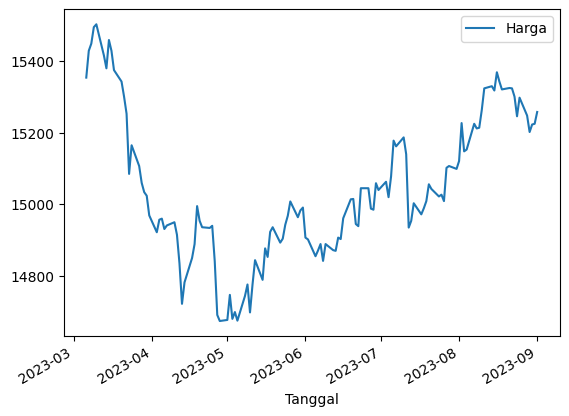

In [30]:
# Visualisasi data line (sehingga mempermudah membaca pergerakan kurs rupiah 6 bulan terakhir)
dfv1.plot()

Data tersebut menggambarkan kurs rupiah selama 6 bulan terakhir. Pada bulan Maret, kurs Rupiah mencapai nilai tertinggi dalam data, diikuti oleh tren bear hingga mencapai titik terendahnya pada akhir bulan Mei, dan kemudian mengalami tren bull hingga akhir periode data.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.